
# Plotting
In this tutorial we will explore the basic plotting tools provided by `pykep` via its {py:class}`~pykep.plot` module. The module was built as to facilitate the incremental construction of plots showing trajectories and other important quantities of interest when planning/designing interplanetary missions.

We start importing the basics:

In [1]:
import pykep as pk
import numpy as np

%matplotlib inline

## 3D Plots
### Plot planets

In most cases one would want to start creating a 3D empty canvas where to incrementally add details. To do so we can avoid a direct interaction with the backend `matplotlib` using the convenience {py:class}`~pykep.plot.make_3Daxis` factory:

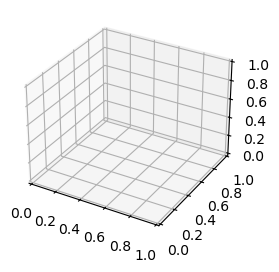

In [2]:
ax = pk.plot.make_3Daxis(figsize = (3,3));

We may then add the Sun and a few planets easily ... in the code below we will make use of the JPL low precision ephemerides, and thus use the {py:class}`~pykep.udpla.jpl_lp` User Defined Planet, but any other udpla would work.

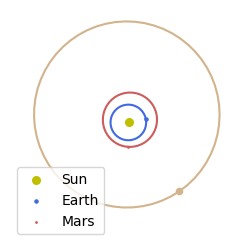

In [3]:
# Earth
udpla = pk.udpla.jpl_lp(body="EARTH")
earth = pk.planet(udpla)

# Mars
udpla = pk.udpla.jpl_lp(body="MARS")
mars = pk.planet(udpla)

#Jupiter
udpla = pk.udpla.jpl_lp(body="JUPITER")
jupiter = pk.planet(udpla)

# Plotting (both the orbit and the planet)
ax = pk.plot.make_3Daxis(figsize = (3,3))
pk.plot.add_sun(ax)

pk.plot.add_planet_orbit(ax, earth, plot_range = [0, 365.25], c = "royalblue", label = "")
pk.plot.add_planet(ax, earth, when = 0, c = "royalblue", s = 5, label="Earth")

pk.plot.add_planet_orbit(ax, mars, label = "", c = "indianred")
pk.plot.add_planet(ax, mars, when = 0, c = "indianred", s = 1, label = "Mars")

pk.plot.add_planet_orbit(ax, jupiter, label = "", c = "tan")
pk.plot.add_planet(ax, jupiter, when = 0, c = "tan")

ax.legend()
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.axis('off')
ax.view_init(90,0)

In some cases it may be useful to add solar system planets at once to a plot. The {py:class}`~pykep.plot.add_solar_system` does just that:

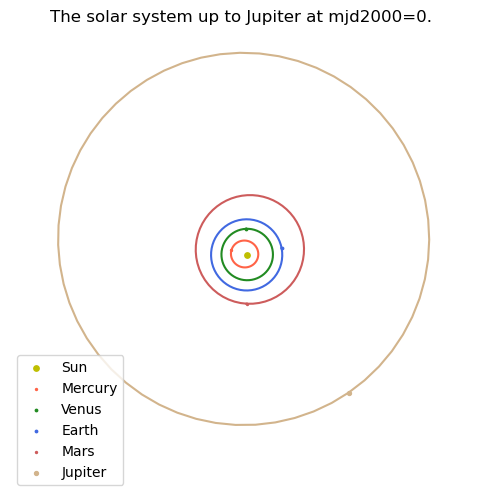

In [4]:
ax = pk.plot.make_3Daxis(figsize = (6,6))
ep = pk.epoch(0)
pk.plot.add_solar_system(ax, bodies = [1,2,3,4,5], ep = ep)
ax.view_init(90,0)
ax.legend()
ax.axis('off')
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.view_init(90,0)
ax.set_title("The solar system up to Jupiter at mjd2000=0.");

### Plot a Lambert arc
The class {py:class}`~pykep.lambert_problem` is used to compute all ballistic arcs transfering in a fixed time of flight from a starting to a final position. In general there are more solutions for a given geometry, in `pykep` the user can plot all of them easily. Lets see how. First we create a Lambert problem, say an Earth-Mars transfer.

In [5]:
t0 = 4340.
tof_days = 280.22
r0, v0 = earth.eph(t0)
r1, v1 = mars.eph(t0+tof_days)
lp = pk.lambert_problem(r0=r0, r1=r1,mu=pk.MU_SUN, tof=tof_days*pk.DAY2SEC )

We can now assemble a plot 

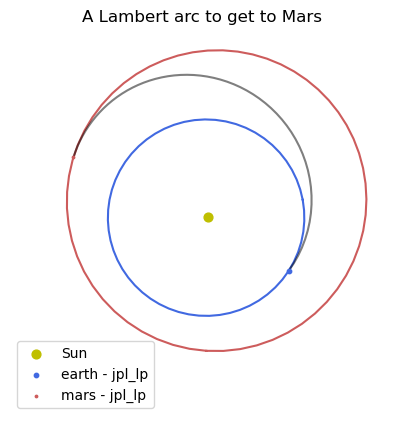

In [6]:
# Making the axis
ax = pk.plot.make_3Daxis(figsize = (5,5))

# Adding the various planets / Sun
pk.plot.add_sun(ax, s=40)

pk.plot.add_planet(ax, earth, when=t0, label = earth.get_name(), c = 'royalblue', s=10)
pk.plot.add_planet_orbit(ax, earth, c = 'royalblue')

pk.plot.add_planet(ax, mars, when=t0 + tof_days, label = mars.get_name(), c = 'indianred', s=3)
pk.plot.add_planet_orbit(ax, mars, c = 'indianred')

# Here we add the Lambert arc
pk.plot.add_lambert(ax, lp, N=60, sol=0, c='k', alpha=0.5)

# Some cosmetics to customize the plot
ax.legend()
ax.axis('off')
ax.set_xlim3d(-1.2,1.2)
ax.set_ylim3d(-1.2,1.2)
ax.view_init(90,0)
ax.set_title("A Lambert arc to get to Mars");


In [7]:
t0 = 2140.
tof_days = 1230.22
r0, v0 = earth.eph(t0)
r1, v1 = mars.eph(t0+tof_days)
lp = pk.lambert_problem(r0=r0, r1=r1,mu=pk.MU_SUN, tof=tof_days*pk.DAY2SEC )

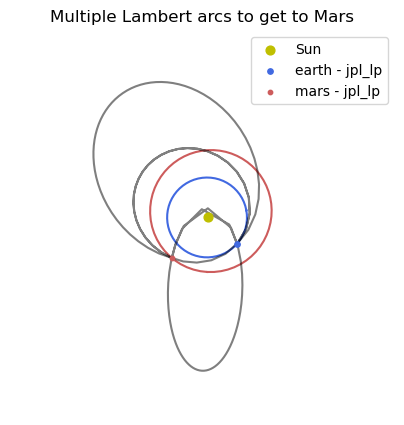

In [8]:
# Making the axis
ax = pk.plot.make_3Daxis(figsize = (5,5))

# Adding the various planets / Sun
pk.plot.add_sun(ax, s=40)

pk.plot.add_planet(ax, earth, when=t0, label = earth.get_name(), c = 'royalblue', s=15)
pk.plot.add_planet_orbit(ax, earth, c = 'royalblue')

pk.plot.add_planet(ax, mars, when=t0 + tof_days, label = mars.get_name(), c = 'indianred', s=10)
pk.plot.add_planet_orbit(ax, mars, c = 'indianred')

# Here we add the Lambert arc
pk.plot.add_lambert(ax, lp, N=60, sol=0, c='k', alpha=0.5)
pk.plot.add_lambert(ax, lp, N=60, sol=1, c='k', alpha=0.5)
pk.plot.add_lambert(ax, lp, N=60, sol=2, c='k', alpha=0.5)



# Some cosmetics to customize the plot
ax.legend()
ax.axis('off')
ax.set_xlim3d(-3,3)
ax.set_ylim3d(-3,3)
ax.view_init(90,0)
ax.set_title("Multiple Lambert arcs to get to Mars");


In [9]:
r,v = [[2,3,40], [4,5,5]]

In [10]:
r

[2, 3, 40]

In [11]:
v

[4, 5, 5]

In [15]:
import numpy as _np

In [37]:
def propagate_lagrangian_theta_v(pos_vel, thetas, mu, stm=False):
    if stm:
        raise NotImplementedError(
            "State Transition Matrix for propagate_lagrangian_theta not implemented yet."
        )
    N = len(thetas)
    retval = _np.zeros((N,6))
    # Preliminary values
    r0 = _np.array(pos_vel[0])
    v0 = _np.array(pos_vel[1])
    R0 = _np.linalg.norm(r0)
    V02 = _np.dot(v0, v0)
    energy = V02 / 2 - mu / R0
    # energy will be negative for hyperbolae
    a = -mu / 2.0 / energy
    sigma0 = _np.dot(r0, v0) / _np.sqrt(mu)
    h = _np.linalg.norm(np.cross(r0, v0))
    p = h * h / mu
    for i, theta in enumerate(thetas):
        Rf = (
            p
            * R0
            / (R0 + (p - R0) * _np.cos(theta) - _np.sqrt(p) * sigma0 * _np.sin(theta))
        )
        F = 1 - Rf / p * (1 - _np.cos(theta))
        G = R0 * Rf / h * _np.sin(theta)
        Ft = (
            _np.sqrt(mu)
            / R0
            / p
            * (sigma0 * (1 - _np.cos(theta)) - _np.sqrt(p) * _np.sin(theta))
        )
        Gt = 1 - R0 / p * (1 - _np.cos(theta))
        rf = F * r0 + G * v0
        vf = Ft * r0 + Gt * v0
        return [rf, vf]

In [27]:
rf, vf = propagate_lagrangian_theta([[1,0,0], [0,1,0]], _np.pi/3, 1.)

In [38]:
pv=_np.vectorize(propagate_lagrangian_theta, excluded=['pos_vel', 'mu', 'stm'])

In [34]:
def prova(x,y):
    return x+y
    
    

In [40]:
propagate_lagrangian_theta([[1,0,0], [0,1,0]], [0,1,2], 1)

[array([1.        , 0.84147098, 0.        ]),
 array([ 0.        ,  0.54030231, -0.        ])]

In [36]:
pv([1,2,3], 1)

array([2, 3, 4])